In [16]:
%matplotlib notebook

In [1]:
import numpy as np
from mpmath import zetazero

from sympy.ntheory import mobius
from sympy import primepi, li, Ei, re, im

import scipy.integrate as integrate
from scipy.special import factorial, zeta

from tqdm.auto import tqdm
import matplotlib.pyplot as plt

from celluloid import Camera
from matplotlib import animation
from IPython.display import HTML

In [ ]:
import matplotlib
matplotlib.use("TkAgg")

### Get zeros of Zeta function

reading from table online

https://math.stackexchange.com/questions/2640941/how-to-locate-zeros-of-the-riemann-zeta-function

https://www-users.cse.umn.edu/~odlyzko/zeta_tables/

In [2]:
from urllib.request import urlopen

url = 'https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros1'

gammas = urlopen(url).read().decode('utf-8').split()
print(len(gammas))

# only taking the first 200 and converting to 0.5 + iγ
zeta_zeros = [.5 + 1j*float(gamma) for gamma in gammas[:200]]

100000


computing using mpmath

https://mpmath.org/doc/current/functions/zeta.html

In [ ]:
zeta_zeros = [zetazero(i) for i in tqdm(range(1,201))]
zeta_zeros = [float(i.real) + 1j*float(i.imag) for i in zeta_zeros]

  0%|          | 0/200 [00:00<?, ?it/s]

In [ ]:
print(*zeta_zeros[:5])

(0.5+14.134725142j) (0.5+21.022039639j) (0.5+25.01085758j) (0.5+30.424876126j) (0.5+32.935061588j)


In [ ]:
z = zeta_zeros[0]
z_conj = 1-z

print(li(2**z) + li(2**z_conj))
# li(x^(ρ/n)) is not evaluated with a branch cut but instead considered as Ei((ρ/n) log x)
print(Ei(z*np.log(2)) + Ei(z_conj*np.log(2)))

0.483914370512644
-0.0867978131930091


### Riemann J function

https://www.privatdozent.co/p/the-riemann-hypothesis-explained-478

$$ J(x) = \pi(x) + \frac{1}{2}\pi(\sqrt{x}) + \frac{1}{3}\pi(\sqrt[3]{x}) + \cdots $$

$$ = \sum_{n=1}^{\lfloor \log x \rfloor} \frac{\pi(x^{1/n})}{n} $$

$$ J_0(x) = li(x) - \sum_{\rho} li(x^{\rho}) - \log 2 + \int_{x}^{\infty} \frac{dt}{t(t^2-1)\log t} $$

the prime counting function $\pi(x)$ is related to $J(x)$ by the Möbius transform

$$ \pi(x) = \sum_{n=1}^{\infty} \frac{\mu(n)}{n} J(\sqrt[n]{x}) $$

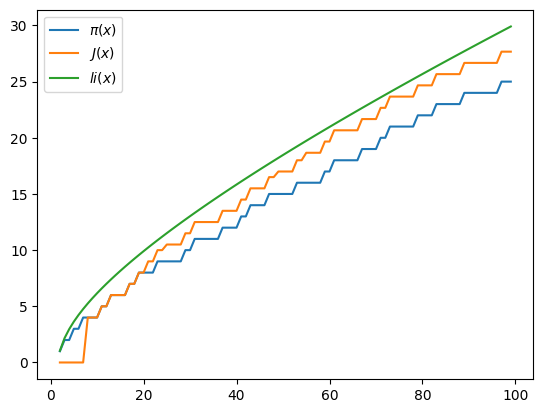

In [40]:
x = list(range(2,100))
plt.plot(x, list(map(primepi, x)), label='$\pi(x)$')

def J(x):
  sum_ = 0
  for n in range(1, int(np.floor(np.log(x)))):
    sum_ += primepi(x**(1/n))/n
  return sum_  

plt.plot(x, list(map(J, x)), label='$J(x)$')
plt.plot(x, list(map(li, x)), label='$li(x)$')
plt.legend()
plt.show()

In [3]:
def integral_term(x):
  return integrate.quad(lambda t: 1/(t*(t*t-1)*np.log(t)), x, np.inf)[0]

print(integral_term(2))  

def fluc_term(p, n_zeros=None):
  sum_ = 0
  for z in zeta_zeros[:n_zeros]:
    z_conj = 1 - z
    # term = li(p**z) + li(p**z_conj)
    term = Ei(z*np.log(p)) + Ei(z_conj*np.log(p))
    sum_ += term
  return sum_

def J(x, n_zeros=None):
  y = li(x)
  y -= fluc_term(x, n_zeros)
  y -= np.log(2)
  y += integral_term(x)
  return y

def pi_0(x, p=1):
  sum_ = 0
  for n in range(1,9):
    mu = mobius(n)
    if mu != 0:
      sum_ += (mu/n) * J(x**(1/n), 35)
  return sum_

print(primepi(100))
print(pi_0(100).evalf())

0.1400101011303665
25
25.1652306097093


### Riemann R function

https://www.cantorsparadise.com/riemanns-explicit-formula-a-beautiful-expression-for-the-prime-counting-function-1c83f5b65dfd

https://empslocal.ex.ac.uk/people/staff/mrwatkin/zeta/encoding1.htm

$$ R(x) = \sum_{n=1}^{\infty} \frac{\mu(n)}{n} li(x^{\frac{1}{n}}) $$

where $\mu(n)$ is the Möbius function, $li(x)$ is the logarithmic integral function, and $li(x^\frac{\rho}{n})$ is not evaluated with a branch cut but instead considered as $Ei(\frac{\rho}{n} \log x)$ where $Ei(x)$ is the exponential integral.

\
The Riemann prime counting function is identical to the [Gram series](https://mathworld.wolfram.com/GramSeries.html)

$$ G(x) = 1 + \sum_{k=1}^{\infty} \frac{(\log x)^{k}}{k k! \zeta (k+1)} $$

In [3]:
# Gram series:
#   incorrect evaluation for complex powers, which are the non-trivial zeta zeros
def G(x, p=1, numsums=10):
  sum_ = 1
  for k in range(1,numsums):
    sum_ += ((p*np.log(x))**k) / (k*factorial(k)*zeta(k+1))
  return sum_

def R(x, p=1, numsums=10):
  sum_ = 0
  for n in range(1, numsums+1):
    mu = mobius(n)
    if mu != 0:
      # if p==1:
      #   sum_ += (mu/n) * li(x**(1/n))
      # else:
        sum_ += (mu/n) * Ei((p/n)*np.log(x))
  return sum_

if 
$\varphi$ is a holomorphic function whose restriction to the real numbers is real-valued, and $\varphi(z)$ and $\varphi(\overline z)$ are defined, then

$ \varphi(\overline z) = \overline{ \varphi \left(z\right) } $

which means, \
$ \varphi(z) + \varphi(\overline z) 
=\varphi(z) + \overline{ \varphi \left(z\right) } $ 

let $\varphi(z)$ be $x+iy$, then $\overline{ \varphi \left(z\right) }$ will be $x-iy$, so \
$ \varphi(z) + \overline{ \varphi \left(z\right) } 
= x+iy + x-iy = 2x$

Hence, \
$ \varphi(z) + \varphi(\overline z) = 2\Re(\varphi(z)) $

In [5]:
z = np.random.rand() + 1j*np.random.rand()

funcs = [li, Ei, np.exp, np.log, np.sin, np.cos]
def R_2(z): return R(z, 2)
funcs += [R_2]
f = np.random.choice(funcs)
fn = f.__name__

print(f'{fn}(z) + {fn}(z.conj)')
print()
print(f'{fn}({z:.3f}) + {fn}({z.conjugate():.3f}) = \
 {complex(f(z)+f(z.conjugate())):.3f}')
print()
print(f'2*real({fn}({z:.3f})) = {2*re(f(z)):.3f}')

R_2(z) + R_2(z.conj)

R_2(0.649+0.455j) + R_2(0.649-0.455j) =  0.815+0.000j

2*real(R_2(0.649+0.455j)) = 0.815


$$ \pi_0(x) = R(x) - \sum_{\rho} R(x^{\rho}) - \sum_{m=1}^{\infty} R(x^{-2m}) $$

In [5]:
def pi_0(x, numsums=10, n_non_trivial=None, n_trivial=5):
  y = R(x, numsums=numsums)

  # sum over non-trivial zeros
  sum_ = 0
  for z in zeta_zeros[:n_non_trivial]:
    term = R(x,z, numsums)
    # term += R(x,1-z, numsums)
    term = 2*re(term)
    sum_ += term
  y -= sum_

  # sum over trivial zeros
  sum_ = 0
  for m in range(1,n_trivial+1):
    term = R(x, -2*m, numsums)
    sum_ += term
  y -= sum_
  
  return y

print(primepi(100))
print(pi_0(100, numsums=9, n_non_trivial=35))

25
25.1586353920915


#### Approximating the prime counting function

Approximating the trivial zeros contribution
$$ \sum_{m=1}^{\infty} R(x^{-2m}) \approx - \frac{1}{\log(x)} + \frac{1}{\pi} \arctan{\frac{\pi}{\log(x)}} $$


Approximating the non-trivial zeros contribution
$$ li(x^{\frac{\rho}{n}}) + li(x^{\frac{\overline\rho}{n}}) = 2\Re (li(x^{\frac{\rho}{n}})) $$
summing over conjugate pairs
$$ 2\Re \left(li\left(x^{\frac{1/2+i\gamma}{n}}\right)\right)
\approx \frac{4n(\sqrt{x})^{1/n}}{\log(x)} \left(\frac{\cos(\frac{\gamma}{n}\log(x)) + 2\gamma\sin(\frac{\gamma}{n}\log(x))}{1+4\gamma^{2}} \right )
\approx \frac{n(\sqrt{x})^{1/n}}{\log(x)} \left(\frac{2\sin(\frac{\gamma}{n}\log(x))}{\gamma} \right ) $$

<br><br>

Approximating the prime counting function
$$ \pi_0(x) =  R(x) - \sum_{\rho} \sum_{n=1}^{\infty} \frac{\mu(n)}{n} li(x^{\frac{\rho}{n}}) - \sum_{m=1}^{\infty} R(x^{-2m}) $$


Substituting equations and approximations
$$ \pi_0(x) \approx  \sum_{n=1}^{\infty} \frac{\mu(n)}{n} li(x^{\frac{1}{n}})
-\sum_{\gamma} \sum_{n=1}^{\infty} \frac{\mu(n)}{n}
\frac{n(\sqrt{x})^{1/n}}{\log(x)} \left(\frac{2\sin(\frac{\gamma}{n}\log(x))}{\gamma} \right )
-\frac{1}{\log(x)} + \frac{1}{\pi} \arctan{\frac{\pi}{\log(x)}} $$

In [6]:
# faster approach

def R_zeta_approx(x, numsums=10, n_non_trivial=None):
  lg = np.log(x)
  
  sum_1 = 0
  for n in range(1, numsums+1):
    mu = mobius(n) 
    if mu != 0:
      # term1 = (4*n*(x**(1/(2*n)))) / lg
      term1 = (n*(x**(1/(2*n)))) / lg
      term1 = (mu/n) * term1
      
      sum_2 = 0
      for z in zeta_zeros[:n_non_trivial]:
        gamma = float(im(z))
        f = (gamma/n) * lg
        # term2 = (np.cos(f)+2*gamma*(np.sin(f))) / (1+4*gamma*gamma)
        term2 = (2*(np.sin(f))) / gamma
        sum_2 += term2
      sum_1 += term1 * sum_2
  return sum_1


def pi_approx(x, numsums=10, n_non_trivial=None):
  y = R(x, numsums=numsums)

  # non-trivial zeros contribution
  y -= R_zeta_approx(x, numsums, n_non_trivial)

  # trivial zeros contribution
  y -= 1/np.log(x)
  y += (1/np.pi) * np.arctan(np.pi/np.log(x))
  
  return y

print(primepi(100))
print(pi_approx(100, numsums=9, n_non_trivial=35))

25
25.1469710196665


Rearranging the summations to speed up computation
$$ \approx  R(x) - \sum_{n=1}^{\infty} \mu(n) \frac{(\sqrt{x})^{1/n}}{\log(x)}
\sum_{\gamma}\left(\frac{2\sin(\frac{\gamma}{n}\log(x))}{\gamma} \right )
-\frac{1}{\log(x)} + \frac{1}{\pi} \arctan{\frac{\pi}{\log(x)}} $$

Using Gram Series instead of R(x)

$$ \approx  1 + \sum_{k=1}^{\infty} \frac{(\log x)^{k}}{k k! \zeta (k+1)}
-\sum_{n=1}^{\infty} \mu(n) \frac{(\sqrt{x})^{1/n}}{\log(x)}
\sum_{\gamma}\left(\frac{2\sin(\frac{\gamma}{n}\log(x))}{\gamma} \right )
-\frac{1}{\log(x)} + \frac{1}{\pi} \arctan{\frac{\pi}{\log(x)}} $$

In [4]:
# fastest that I could get

# calculates R(x) by approximating li(x)
# using x / log(x) but doesnt give good result
# better to use G(x) instead of this function
def R_approx(x, p=1, numsums=10):
  sum_ = 0
  for n in range(1, numsums+1):
    mu = mobius(n)
    if mu != 0:
      x1 = (x**(p/n)) / ((p/n)*np.log(x))
      sum_ += (mu/n) * x1
  return sum_

def R_zeta_approx(x, numsums=10, n_non_trivial=None):
  lg = np.log(x)
  
  sum_1 = 0
  for n in range(1, numsums+1):
    mu = mobius(n) 
    if mu != 0:
      # term1 = (4*n*(x**(1/(2*n)))) / lg
      term1 = (n*(x**(1/(2*n)))) / lg
      term1 = (mu/n) * term1
      
      sum_2 = 0
      for z in zeta_zeros[:n_non_trivial]:
        gamma = float(im(z))
        f = (gamma/n) * lg
        # term2 = (np.cos(f)+2*gamma*(np.sin(f))) / (1+4*gamma*gamma)
        term2 = (2*(np.sin(f))) / gamma
        sum_2 += term2
      sum_1 += term1 * sum_2
  return sum_1

def pi_approx(x, numsums=10, n_non_trivial=None):
  # y = R_approx(x, numsums=numsums)
  y = G(x, numsums=20)

  # non-trivial zeros contribution
  y = y - R_zeta_approx(x, numsums, n_non_trivial)

  # trivial zeros contribution
  y -= 1/np.log(x)
  y += (1/np.pi) * np.arctan(np.pi/np.log(x))
  
  return y

print(primepi(100))
print(pi_approx(np.array([100]), numsums=9, n_non_trivial=100))

25
[24.9132113317038]


#### plot

  0%|          | 0/200 [00:00<?, ?it/s]

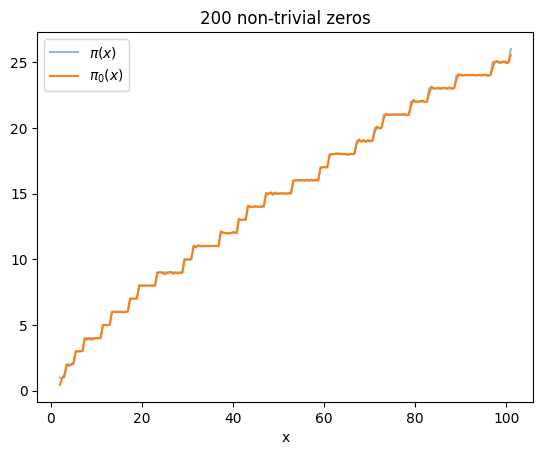

In [73]:
xmin, xmax = 2, 101
x = np.linspace(xmin, xmax, 200)
numsums = int(np.ceil(np.log2(xmax))+1)
n_non_trivial = 200

y_pi = list(map(primepi, tqdm(x)))
plt.plot(x, y_pi, alpha=0.5, label='$\pi(x)$')

y_pi_appr = pi_approx(x, numsums=numsums, n_non_trivial=n_non_trivial)
plt.plot(x, y_pi_appr, label='$\pi_0(x)$')
plt.title(f'{n_non_trivial} non-trivial zeros')
plt.xlabel('x')
plt.legend()
plt.show()

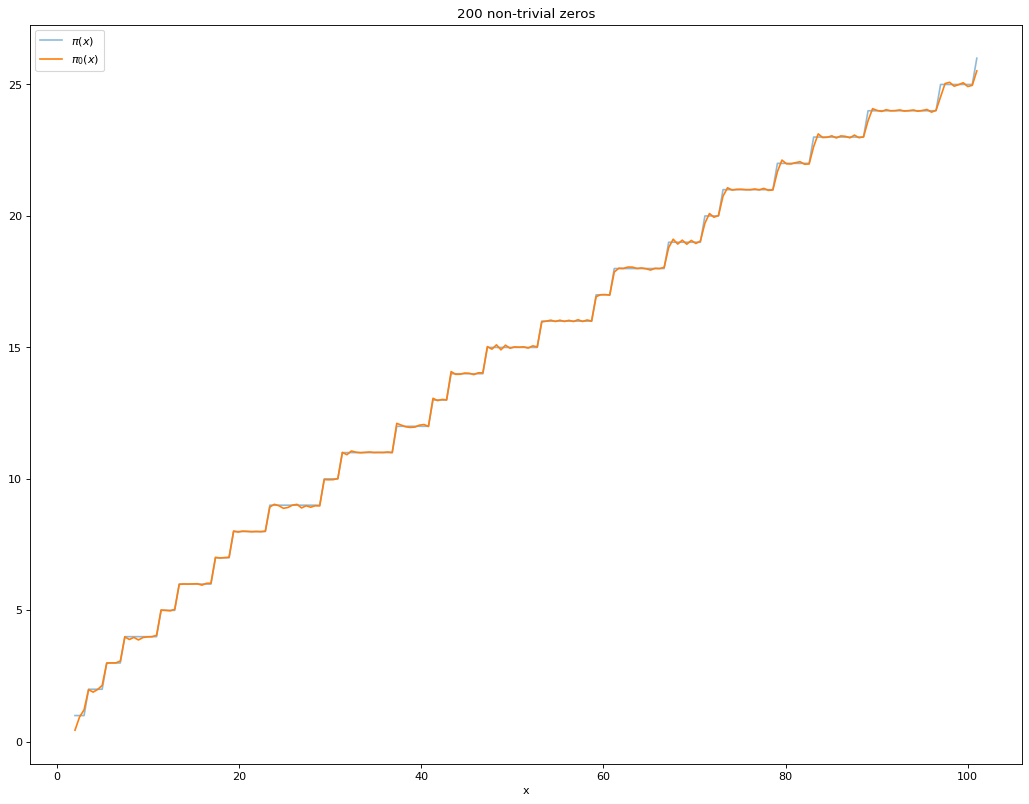

In [74]:
plt.figure(figsize=(16, 12), dpi=80)
plt.plot(x, y_pi, alpha=0.5, label='$\pi(x)$')
plt.plot(x, y_pi_appr, label='$\pi_0(x)$')
plt.title(f'{n_non_trivial} non-trivial zeros')
plt.xlabel('x')
plt.legend()
plt.show()

#### animation

In [29]:
xmin, xmax = 2, 101
x = np.linspace(xmin, xmax, 200)

numsums = int(np.ceil(np.log2(xmax))+1)
n_non_trivial = None # 101

pi_approx_vals = []
n_list = list(range(1+len(zeta_zeros)))
n_list = n_list[:n_non_trivial]

for n in tqdm(n_list):
  y = pi_approx(x, numsums=numsums, n_non_trivial=n)
  pi_approx_vals.append(y)
pi_approx_vals = np.array(pi_approx_vals, dtype=float)

  0%|          | 0/201 [00:00<?, ?it/s]

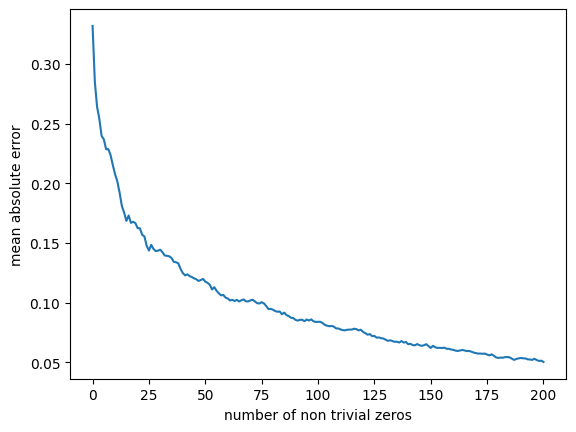

In [30]:
errs = (abs(list(map(primepi, x))-pi_approx_vals)).mean(axis=1)
plt.xlabel('number of non trivial zeros')
plt.ylabel('mean absolute error')
plt.plot(n_list, errs)
plt.show()

In [25]:
y = list(map(primepi, x))

def animate():
  fig = plt.figure()
  camera = Camera(fig)
  
  for i,n in enumerate(tqdm(n_list)):
    plt.text(10,23,f'{round(n,2)} non-trivial zeros')
    plt.text(10,20,f'MAE: {errs[i]:.3f}')
    if i==0:
      plt.plot(x,y, alpha=0.5, c='#1f77b4', label='$\pi(x)$')
      plt.plot(x,pi_approx_vals[i], c='#ff7f0e', label='$\pi_0(x)$')
    else:
      plt.plot(x,y, alpha=0.5, c='#1f77b4')
      plt.plot(x,pi_approx_vals[i], c='#ff7f0e')
    plt.xlabel('x')
    plt.legend(loc='lower right')
    camera.snap()
    
  return camera

In [ ]:
camera = animate()
anim = camera.animate()
anim.save(f'Pi0_{int(n_list[-1])}.gif', writer=animation.PillowWriter(fps=10))
_ = plt.show()

In [15]:
HTML(anim.to_jshtml(fps=10, default_mode='reflect'))

#### widget

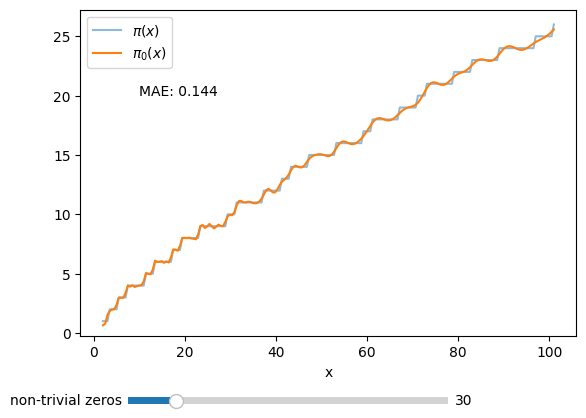

In [10]:
from matplotlib.widgets import Slider, Button

y = list(map(primepi, x))
plt.plot(x,y, alpha=0.5, label='$\pi(x)$')
line, = plt.plot(x,y, label='$\pi_0(x)$')
text = plt.text(10,20,'MAE: ')
plt.xlabel('x')
plt.legend()

ax_nonTrivSlid = plt.axes([0.2, 0.05, 0.5, 0.03])
nonTriv_slider = Slider(ax_nonTrivSlid, 'non-trivial zeros', 0, 200, 30, valfmt="%i")


def update(val):
  n_nonTriv = int(nonTriv_slider.val)
  y = pi_approx_vals[n_nonTriv]
  line.set_ydata(y)
  text.set_text(f'MAE: {errs[n_nonTriv]:.3f}')


# Call update function when slider value is changed
update(None)
nonTriv_slider.on_changed(update)


plt.subplots_adjust(bottom=0.2)
plt.show()